In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [6]:
data = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
data.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [7]:
data['km_por_ano'] = dados['milhas_por_ano'] * 1.60934

In [8]:
data.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [11]:
data['idade'] = datetime.today().year - data['ano_do_modelo']
data.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,25
1,7843,1998,40557.96,1,12622.05362,27
2,7109,2006,89627.50,0,11440.79806,19
3,26823,2015,95276.14,0,43167.32682,10
4,7935,2014,117384.68,1,12770.11290,11


In [13]:
data.drop(['milhas_por_ano', 'ano_do_modelo'], axis=1, inplace=True)
data.head()

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,25
1,40557.96,1,12622.05362,27
2,89627.50,0,11440.79806,19
3,95276.14,0,43167.32682,10
4,117384.68,1,12770.11290,11


In [14]:
X = data[['preco', 'km_por_ano', 'idade']]
Y = data['vendido']

In [16]:
X.head()

,preco,km_por_ano,idade
0,30941.02,35085.22134,25
1,40557.96,12622.05362,27
2,89627.50,11440.79806,19
3,95276.14,43167.32682,10
4,117384.68,12770.11290,11


In [17]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: vendido, dtype: int64

In [21]:
SEED = 99

raw_train_X, raw_test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=SEED)

scaler = StandardScaler()
scaler.fit(raw_train_X)
train_X = scaler.transform(raw_train_X)
test_X = scaler.transform(raw_test_X)

model = SVC(gamma='auto')
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
accuracy = accuracy_score(test_Y, prediction) * 100
print(f'Accuracy of {accuracy:.2f}%')

Accuracy of 77.25%


In [22]:
len(raw_train_X), len(raw_test_X)

(8000, 2000)

In [24]:
SEED = 99

raw_train_X, raw_test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=SEED)

scaler = StandardScaler()
scaler.fit(raw_train_X)
train_X = scaler.transform(raw_train_X)
test_X = scaler.transform(raw_test_X)

model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
accuracy = accuracy_score(test_Y, prediction) * 100
print(f'Accuracy of {accuracy:.2f}%')

Accuracy of 71.85%


In [27]:
structure = export_graphviz(model)
graph = graphviz.Source(structure)
graph

In [32]:
SEED = 99

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=SEED)

model = DecisionTreeClassifier(max_depth=3)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
accuracy = accuracy_score(test_Y, prediction) * 100
print(f'Accuracy of {accuracy:.2f}%')

Accuracy of 77.80%


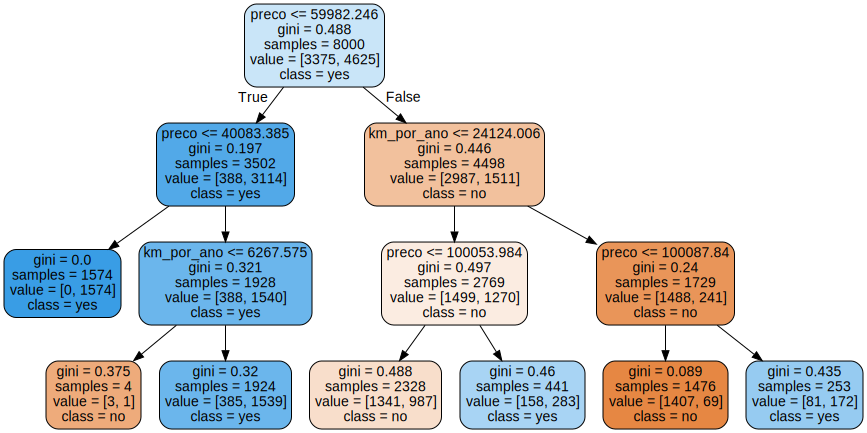

In [33]:
structure = export_graphviz(model, filled=True, rounded=True, feature_names=X.columns, class_names=['no', 'yes'])
graph = graphviz.Source(structure)
graph